### Trabalho 1
#### Alunos
    Danielle Regina Bernardes
    Joao Fernando Vieira Fraciscon

#### Algumas ultilidades

In [8]:
import time

In [65]:
def fact(n):
    '''calcula fatorial'''
    if n == 0:
        return 1
    else:
        return n*fact(n-1)

### Triângulo de Pascal

#### Funcionalidades do programa
    Escreva um programa que obtenha (n, m) como entrada e escreva as saídas p(n, m). Em que (n, m) <=50.
    Utilize um array (ou arrays) para implementar o programa.
    
    Implemente funções que permitam:
        - Obter a soma de uma linha
        - Obter a soma de uma coluna
        - Encontrar um número no array.

Essa tentativa é meio 'brute force'. Ela gera todas as linhas do triangulo, assumindo que a primeira e a ultima coluna sempre são 1, e que a segunda e a penultima são sempre (numero da linha - 1).

Depois, é calculado a proxima linha com base na ultima, ignorando o primeiro, segundo, penultimo e ultimo termo, com a formula:

    linha_atual[n] = linha_anterior[n] + linha_anterior[n - 1]
Onde n é o índice do elemento.
Desta forma, o numero na posição 4 na linha seria determinado por
    
    linha_atual[3] = linha_anterior[3] + linha_anterior[3 - 1]
    
    Lembrando que o indice começa em 0, portanto o quarto elemento é, na verdade, o 3.

A _linha atual_ é entao adicionada ao triangulo, que é uma lista de listas.

In [70]:
class pascal_triangle:

    def __init__(self, n):
        '''
        gera o triangulo com n linhas
        '''
        matrix = []
        last_row = []
        for row_number in range(1, n+1): # loop todas linhas
            row = [0 for element in range(row_number)] # uma linha placeholder, pra ter onde agir depois [0, 0, 0, [...]]

            row[0], row[-1] = 1, 1 # define primeira e ultima coluna como 1
            if row_number > 2:
                row[1], row[-2] = row_number-1, row_number-1 # define segunda e penultima coluna como (numero da linha - 1)

            if row_number >= 5: # o calculo dos termos do meio soh eh necessario a partir da linha 5
                for i, element in enumerate(row[2:-2]): # seleciona apenas os termos no meio, ignorando primeiro, ultimo, segundo e penultimo
                    row[2+i] = last_row[i+2] + last_row[i+1] # calcula o valor desse termo baseado nos valores da linha anterior
            last_row = row
            matrix.append(row)
            
        self.matrix = matrix
        return 

    def show(self):
        '''da um print melhorzinho no triangulo'''
        print('Triangulo com', len(self.matrix), 'linhas')
        for row in self.matrix:
            print(row)
            
    def sum_line(self, row):
        '''funçao que executa a soma de uma linha'''
        return sum(self.matrix[row-1])
    
    def sum_col(self, col):
        '''funçao que executa a soma de uma coluna'''
        col-=1 # mudar de index 0 p/ index 1
        scol = 0
        for row in self.matrix:
            if len(row) > col:
                scol+=row[col]
        return scol
    
    def loc(self, n):
        '''localiza um elemento no triangulo, se ele estiver lá'''
        if any(n in row for row in self.matrix):
            for i, row in enumerate(self.matrix):
                if n in row:
                    idx = (i+1, row.index(n)+1)
                    print(f'Numero encotrado na linha {i+1}, coluna {row.index(n)+1}')
                    # retorna a posição do numero (m, n)
                    return idx
                
        else:
            print('Numero nao encotrado')
            return None
        return
    
    def iloc(self, row, col):
        '''localiza o numero na posiçao (row, col)'''
        try:
            print(f'Numero na linha {row} e coluna {col}: {self.matrix[row-1][col-1]}')
            return self.matrix[row-1][col-1]
        # caso seja inserido uma coluna ou linha nao existente no triangulo
        except IndexError:
            print('Referencias invalidas')
            return
        except:
            print('Erro inesperado')
            return
    
    @staticmethod
    def qualquer_linha(row, col):
        if col > row:
            print('Coordenadas invalidas')
            return
        row-=1
        col-=1
        numerador = fact(row)
        denominador = fact(col)*fact(row-col)
        return numerador/denominador
        

Utilizando o código acima, um triangulo com n linhas pode ser gerado da seguinte forma

In [94]:
triangulo = pascal_triangle(11)

Com o método .show(), é possivel visualizar o triangulo gerado

In [95]:
triangulo.show()

Triangulo com 11 linhas
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]


Os métodos para soma de um linha/coluna funcionam como esperado, <br> recebendo um numero de linha ou coluna e retornando seu valor

In [96]:
print('Soma da linha 5:', triangulo.sum_line(5))
print('Soma da coluna 1:', triangulo.sum_col(1))

Soma da linha 5: 16
Soma da coluna 1: 11


O método de localização permite encontrar qualquer número dentro do triangulo gerado, <br>independente de onde ele esteja.

In [46]:
print(triangulo.loc(20), '\n')
print(triangulo.loc(21000))

Numero encotrado na linha 7, coluna 4
(7, 4) 

Numero nao encotrado
None


Também é possível encontrar um número baseado em suas coordenadas

In [93]:
triangulo.iloc(3, 3)

Numero na linha 3 e coluna 3: 1


1

E por fim, o metodo estático .qualquer_linha retorna qualquer numero possivel no triangulo, <br> independente ele estar contido no triangulo gerado inicialmente

In [100]:
# linha 50, coluna 25
triangulo.qualquer_linha(50, 25)

63205303218876.0

#### Versão alternativa utilizando recursividade

In [32]:
class pascal_recursive:
    
    def calcula_posicao(self, n, k):
        if k == 0 or k == n:
            return 1
        else:
            return int(self.calcula_posicao(n - 1, k - 1)) + int(self.calcula_posicao(n - 1, k))

    def __init__(self, linhas):
        triangulo = []

        for linha in range(linhas):
            valores_linha = []

            for coluna in range(linha + 1):
                valores_linha.append(self.calcula_posicao(linha, coluna))

            triangulo.append(valores_linha)
        self.matrix = triangulo
        return
    
    def show(self):
        '''da um print melhorzinho no triangulo'''
        print('Triangulo com', len(self.matrix), 'linhas')
        for row in self.matrix:
            print(row)
            
    def sum_line(self, row):
        '''funçao que executa a soma de uma linha'''
        return sum(self.matrix[row-1])
    
    def sum_col(self, col):
        '''funçao que executa a soma de uma coluna'''
        col-=1 # mudar de index 0 p/ index 1
        scol = 0
        for row in self.matrix:
            if len(row) > col:
                scol+=row[col]
        return scol
    
    def loc(self, n):
        '''localiza um elemento no triangulo, se ele estiver lá'''
        if any(n in row for row in self.matrix):
            for i, row in enumerate(self.matrix):
                if n in row:
                    idx = (i+1, row.index(n)+1)
                    print(f'Numero encotrado na linha {i+1}, coluna {row.index(n)+1}')
                    # retorna a posição do numero (m, n)
                    return idx
                
        else:
            print('Numero nao encotrado')
            return None
        return
    
    def iloc(self, row, col):
        '''localiza o numero na posiçao (row, col)'''
        try:
            print(f'Numero na linha {row} e coluna {col}: {self.matrix[row-1][col-1]}')
            return self.matrix[row-1][col-1]
        # caso seja inserido uma coluna ou linha nao existente no triangulo
        except IndexError:
            print('Referencias invalidas')
            return
        except:
            print('Erro inesperado')
            return
        

As mesmas funções para localização de elementos, somas e print também funcionam no metodo recursivo.

In [36]:
nx = pascal_recursive(10)
nx.show()
print('Soma da linha 3:', nx.sum_line(3), '\n')
print('Soma da coluna 2:', nx.sum_col(2), '\n')
print(nx.loc(20), '\n')
print(nx.loc(1500), '\n')
print(nx.iloc(4, 2))

Triangulo com 10 linhas
[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
Soma da linha 3: 4 

Soma da coluna 2: 45 

Numero encotrado na linha 7, coluna 4
(7, 4) 

Numero nao encotrado
None 

Numero na linha 4 e coluna 2: 3
3


### Comb sort

In [1]:
import random

In [2]:
def gen_gap(gap):
    gap = gap/1.3
    if gap < 1:
        return int(1)
    else:
        return int(gap)

def comb_sort(values):
    start = time.time()
    ncomp = 0
    swap = False
    gap = len(values)
    
    while not swap:
        gap = gen_gap(gap)
        if gap == 1:
            swap = True
        for i in range(len(values) - gap):
                ncomp+=1
                if values[i] > values[i+gap]:
                    values[i], values[i+gap]  = values[i+gap], values[i]
                    swap = False
    end = time.time()-start
    return values, end, ncomp

Versão iterativa

In [18]:
def comb_sort_iter(n):
    gap = len(n)
    clas = True
    
    while gap > 1 or clas:
        gap = max(1, int(gap/1.3))
        clas = False
        
        for i in range(len(n)-gap):
            j = i + gap
            if n[i] > n[j]:
                n[i], n[j] = n[j], n[i]
                clas = True
    return n

A celula abaixo executa o algoritmo em diferentes tamanhos de listas, 100 vezes para cada, e guarda os resultados em um dicionario.

In [11]:
to_run = [100, 200, 500, 1000, 5000, 10000, 50000, 100000, 200000]
total_times = {}
run = []

for r, run in enumerate(to_run):
    v = [random.randrange(1, 2*run) for n in range(run)]
    v_s = comb_sort(v)
    # print(f'{r} - Tamanho da lista: {run}, tempo de execucao: {round(v_s[1], 3)}, N comparacoes: {v_s[2]}')
    total_times[run] = [(0, v_s[1:])]

# 100 vezes demora cerca de 7 minutos pra executar
# for i in range(1, 100):
for i in range(1, 10):
    for r, run in enumerate(to_run):
        v = [random.randrange(1, 2*run) for n in range(run)]
        v_s = comb_sort(v)
        # print(f'{r} - Tamanho da lista: {run}, tempo de execucao: {round(v_s[1], 3)}, N comparacoes: {v_s[2]}')
        total_times[run].append((i, v_s[1:]))

#### Gráficos

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statistics import mean

Calcula as medias para cada tamanho de lista

In [63]:
avgs = {}

for key in total_times.keys():
    avgs[key] = mean([x[1][0] for x in total_times[key]])

Criação de um DataFrame para utilização no gráfico

In [64]:
df = pd.DataFrame.from_dict(avgs, orient='index', columns=['avg_time'])

In [65]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'list_size'}, inplace=True)

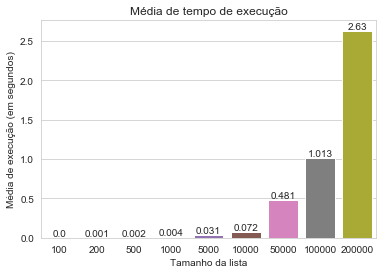

In [107]:
# estilo melhorzinho
sns.set_style('whitegrid')
# criação do grafico em si
ax = sns.barplot(x='list_size', y='avg_time', data=df)
# adição dos nomes dos eixos
ax.set(xlabel='Tamanho da lista', ylabel='Média de execução (em segundos)')

# adição dos valores em cada barra
for rect, value in zip(ax.patches, df['avg_time']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, round(value, 3),
            ha='center', va='bottom')

# titulo do gráfico
ax.set_title('Média de tempo de execução')

# salvar a imagem em alta definição
# fig = ax.get_figure()
# fig.savefig('avg.png', dpi=300)